In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv("DryBean_FinalDataset.csv")


In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [4]:
#train正規化
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])


In [5]:
x = df_feat
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [6]:
MAE = []
RMSE = []
MAPE = []

for k in range(1,60):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    MAE.append(metrics.mean_absolute_error(y_test,y_pred))

    MSE = metrics.mean_squared_error(y_test,y_pred)
    RMSE.append(np.sqrt(MSE))
    MAPE.append(np.mean(np.abs((y_test - y_pred)/y_test))*100)

Text(0, 0.5, 'MAE')

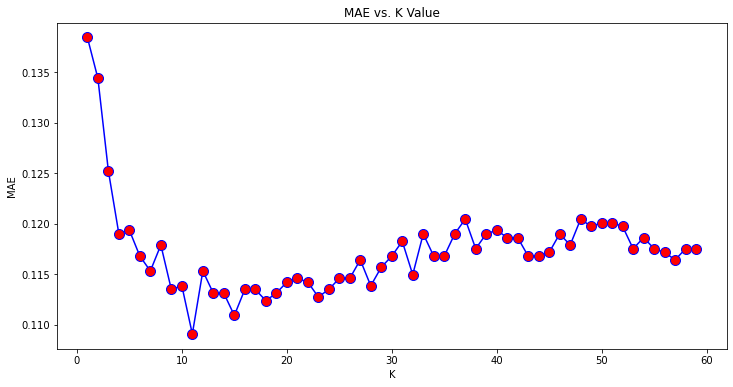

In [7]:
plt.figure(figsize=(12,6))
plt.plot(range(1,60),MAE,color='blue',linestyle='solid',marker='o',markerfacecolor='red',markersize=10)
plt.title('MAE vs. K Value')
plt.xlabel('K')
plt.ylabel('MAE')

Text(0, 0.5, 'RMSE')

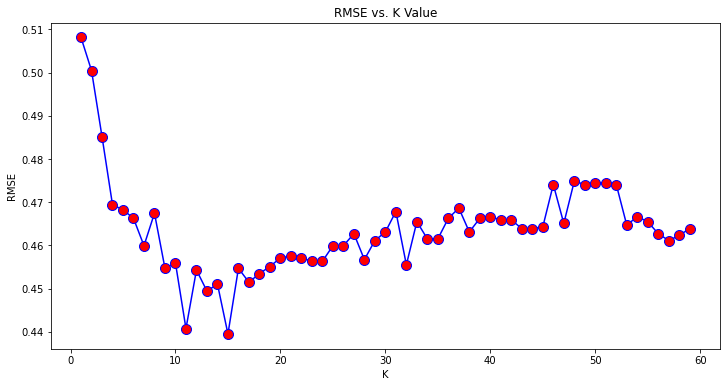

In [8]:
plt.figure(figsize=(12,6))
plt.plot(range(1,60),RMSE,color='blue',linestyle='solid',marker='o',markerfacecolor='red',markersize=10)
plt.title('RMSE vs. K Value')
plt.xlabel('K')
plt.ylabel('RMSE')